# Data Analysis of Red Wine Dataset Using DBSCAN&PCA

## Libraries Required for Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import time
from datetime import date

## Context of Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository https://archive.ics.uci.edu/ml/datasets/wine+quality 

### Content of Dataset

For more information, read **[Cortez et al., 2009]**

*Input variables (based on physicochemical tests):*

1. fixed acidity

2. volatile acidity

3. citric acid

4. residual sugar

5. chlorides

6. free sulfur dioxide

7. total sulfur dioxide

8. density

9. pH

10. sulphates

11. alcohol

*Output variable (based on sensory data):*

12. quality (score between 0 and 10)

### Relevant Publication Regarding the Dataset

**P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.**
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


In [2]:
data = 'winequality-red.csv'
wine = pd.read_csv(data)
wine.shape

(1599, 12)

The red wine dataset consists of 1599 rows and 12 columns.

In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Let's look at the descriptive statistics summary of the dataframe

In [6]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.value_counts().to_frame()

0
fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH   sulphates alcohol quality   
7.5           0.510            0.02        1.7            0.084     13.0                31.0                 0.99538 3.36 0.54      10.5    6        4
6.7           0.460            0.24        1.7            0.077     18.0                34.0                 0.99480 3.39 0.60      10.6    6        4
7.2           0.360            0.46        2.1            0.074     24.0                44.0                 0.99534 3.40 0.85      11.0    7        4
              0.695            0.13        2.0            0.076     12.0                20.0                 0.99546 3.29 0.54      10.1    5        4
8.3           0.650            0.10        2.9            0.089     17.0                40.0                 0.99803 3.29 0.55      9.5     5        3
...                                                                                                                                                 ..
7.5           0.430            0.30        2.2            0.062     6.0                 12.0                 0.99495 3.44 0.72      11.5    7        1
              0.420            0.32        2.7            0.067     7.0                 25.0                 0.99628 3.24 0.44      10.4    5        1
                               0.31        1.6            0.080     15.0                42.0                 0.99780 3.31 0.64      9.0     5        1
              0.410            0.15        3.7            0.104     29.0                94.0                 0.99786 3.14 0.58      9.1     5        1
15.9          0.360            0.65        7.5            0.096     22.0                71.0                 0.99760 2.98 0.84      14.9    5        1

[1359 rows x 1 columns]

# Data Cleaning

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

We have to clean our dataset before going deep into the analysis otherwise our model that we will implement may produce inaccurate results

Let's check if there is any missing data

In [9]:
wine.isnull().any().any()

False

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's look at if each elements are numeric in the dataframe. If they are, then we dont have to think too much on that

In [11]:
wine.applymap(np.isreal)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,True,True,True,True,True,True,True,True,True,True,True,True
1595,True,True,True,True,True,True,True,True,True,True,True,True
1596,True,True,True,True,True,True,True,True,True,True,True,True
1597,True,True,True,True,True,True,True,True,True,True,True,True


# Data Visualisation

One of the great features of the seaborn library is that with just one line of code we can create many beautiful plots. One of them is *Pair Plot*.

*Pair Plots* are a really good way to visualize relationships between each variable. It produces a matrix of relationships between each variable in our data for an instant examination of our data.  ps. *because of the huge number of dimension in our dataset, generating pair plots takes around 20 to 30 seconds*.

Seaborn *distplot* lets you show a histogram with a line on it. This can be shown in all kinds of variations.

Seaborn *barplot* is basically used to aggregate the categorical data according to some methods and by default it’s the mean.

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


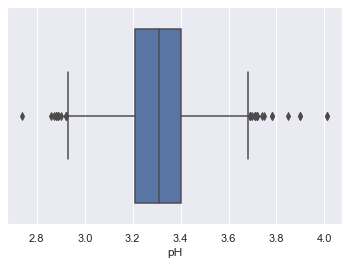

In [12]:
seaborn_plot = sns.boxplot(wine['pH'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


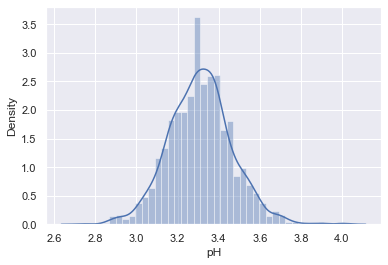

In [13]:
seaborn_plot = sns.distplot(wine['pH'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


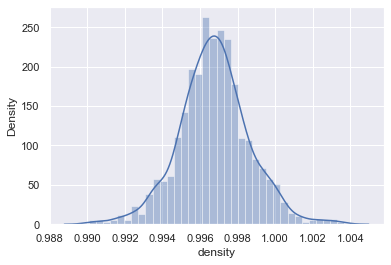

In [14]:
seaborn_plot = sns.distplot(wine['density'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


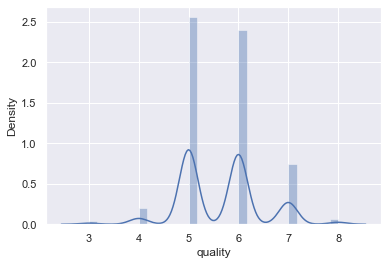

In [15]:
seaborn_plot = sns.distplot(wine['quality'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


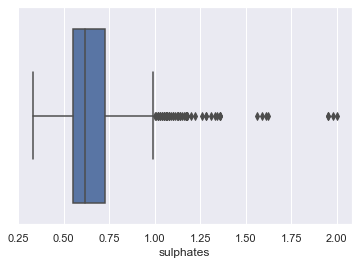

In [16]:
seaborn_plot = sns.boxplot(wine['sulphates'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


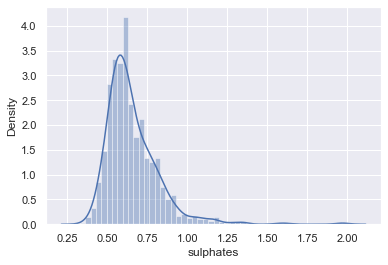

In [17]:
seaborn_plot = sns.distplot(wine['sulphates'])

C:\Users\Lanzelit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


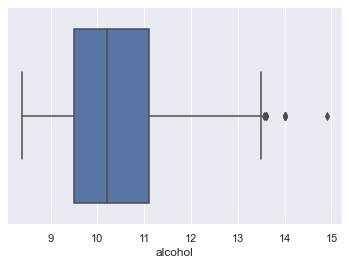

In [18]:
seaborn_plot = sns.boxplot(wine['alcohol'])

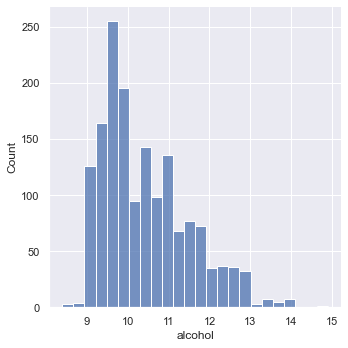

In [19]:
seaborn_plot = sns.displot(wine['alcohol'])

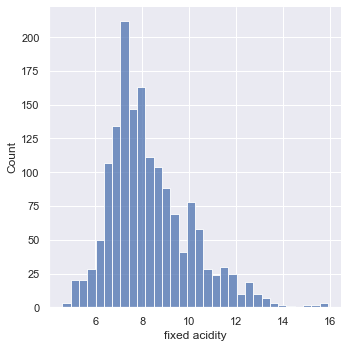

In [20]:
seaborn_plot = sns.displot(wine['fixed acidity'])

In [21]:
#seaborn_plot = sns.pairplot(wine)

# Pre Processing

To understand the real quality of the wine, let's create new column called Quality Class which will help us to say what is the real quality of the wine. Such as first, second or third quality


In [22]:
wine['quality_class'] = wine['quality'].apply(lambda value: 1 if value < 5 else 2 if value < 7 else 3)

Time to divide our data set for Machine Learning. To do that, we are going to use Sckit-learn library.

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 

We are going to divide our data set into Train and Test data with train_test_split(). However before doing that we need to standardize our data with StandardScaler()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = wine.iloc[:,0:11]
y = wine['quality_class']

X_sca = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size=0.30, random_state=42)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


# Dimension Reduction
Dimensionality reduction is the task of reducing the number of features in a dataset. In machine learning tasks like regression or classification, there are often too many variables to work with. These variables are also called features. The higher the number of features, the more difficult it is to model them.

It can be divided into feature selection and feature extraction. For **Feature Extraction** we are going to use Principal Component Analysis, For **Feature Selection** we are going to use Pearson's Correlation.


## Principal Component Analysis

Principal Component Analysis or PCA is a widely used technique for dimensionality reduction of the large data set. Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize. Also, it reduces the computational complexity of the model which makes machine learning algorithms run faster.


In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
principal_ca = PCA(n_components=6)
X_new = principal_ca.fit_transform(X_sca)

print(principal_ca.explained_variance_ratio_.sum())

0.8552471350764362


In [28]:
print(principal_ca.explained_variance_ratio_)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]


## Pearson's Correlation

Pearson’s Correlation Coefficient helps us find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 to +1.

1 means that they are highly correlated and 0 means no correlation. -1 means that there is a negative correlation. 

Let's create a correlation matrix

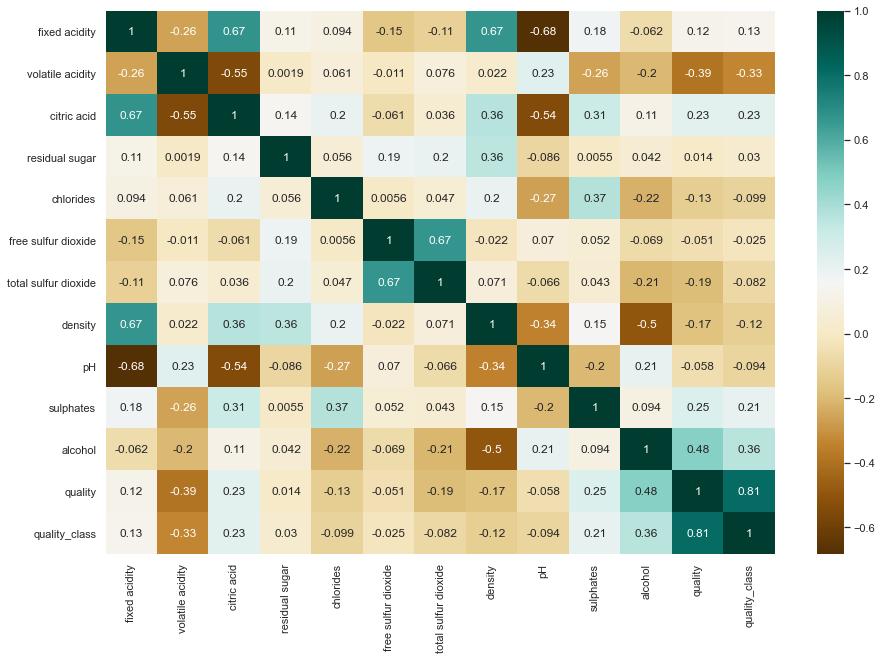

In [29]:
correlation_matrix=wine.corr()

plt.figure(figsize=(15,10))
sns_plot=sns.heatmap(data=correlation_matrix, annot=True, cmap='BrBG')
plt.show()

A correlation matrix was built using a *0.5 to -0.5* correlation as a baseline to screen out variables that are substantially connected to red wine quality. All characteristics are within the tolerable limits of *0.6 to -0.5*, according to our findings. The heatmap shows that most characteristics are weakly associated to wine quality, excluding alcohol (0.48), which has a considerable relationship.

*Other way of saying that;*

1. **Acidity** (-0.39)

2. **chlorides** (-0.13)

3. **free sulfur dioxide** (-0.051)

4. **total sulfur dioxide** (-0.19)

5. **density** (-0.17) and **PH** (-0.058)
are negatively correlated to the quality of wine; as these variables decrease, the quality of wine will increase vice versa. 



Just the opposite, 

1. **fixed acidity** (0.12)

2. **citric acid** (o.23)

3. **residual sugar** (0.014)

4. **sulphates** (0.25) and **alcohol** (0.48) are positively correlated to the quality of wine; as these variables increase, the quality of wine improves.

Last but not least, Let's check the highly corelated values to remove

In [30]:
posible_col = correlation_matrix.index[
    (correlation_matrix['quality'] > 0.4) | (correlation_matrix['quality'] < -0.4)
].values
posible_col = posible_col[posible_col != 'quality']
print('Correlated to', 'quality', ': ', posible_col)

Correlated to quality :  ['alcohol' 'quality_class']


In [31]:
wine[['quality_class','quality']].corr()

,quality_class,quality
quality_class,1.000000,0.812367
quality,0.812367,1.000000


In [32]:
wine[['alcohol','quality']].corr()

,alcohol,quality
alcohol,1.000000,0.476166
quality,0.476166,1.000000


# Unsupervised Machine Learning


## 1. Density-based spatial clustering of applications with noise

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm.It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). 

DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In 2014, the algorithm was awarded the test of time award (an award given to algorithms which have received substantial attention in theory and practice) at the leading data mining conference, ACM SIGKDD.


In [33]:
from sklearn.cluster import DBSCAN

Higher min_samples or lower epsilon indicate higher density required to create a cluster.

In [34]:
dbscan = DBSCAN(eps=2, min_samples=7)
s_time = time.time()
clusters= dbscan.fit_predict(X_sca)
n = date.today()
print("%s second" % (time.time() - s_time))

0.12532854080200195 second


In [35]:
np.unique(clusters)

array([-1,  0,  1], dtype=int64)

**2D Visualization of Clusters**

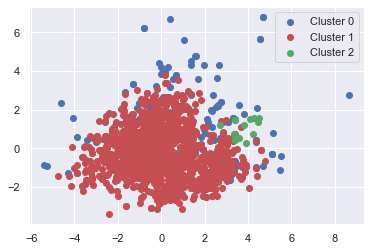

In [36]:
clr = 'rgb'
for i in np.unique(clusters):
    plt.scatter(X_new[clusters==i,0],
               X_new[clusters==i,1],
               color=clr[i], label='Cluster' + " " + str(i+1))
plt.legend()

**3D Visualization of Clusters**

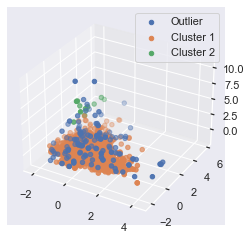

In [37]:
clr = 'rgb'
axes = plt.axes(projection='3d')
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster'+ " " + str(i + 1)
    axes.scatter3D(X_sca[clusters==i,0], X_sca[clusters==i,1],X_sca[clusters==i,4], label=label)

plt.legend()
plt.show()

Let's evaluate the model

In [38]:
predicted_labels = dbscan.labels_
metrics.silhouette_score(X_sca, predicted_labels, metric='manhattan')

0.3173646956518413

## 2.Density-based spatial clustering of applications with noise with PCA

Let's also evaluate our model wtih Principal Component Analysis

In [39]:
dbscan = DBSCAN(eps=2, min_samples=7)
s_time = time.time()
clusters= dbscan.fit_predict(X_new)
n = date.today()
print("%s second" % (time.time() - s_time))

0.07605290412902832 second


In [40]:
np.unique(clusters)

array([-1,  0,  1], dtype=int64)

**2D Visualization of Clusters**

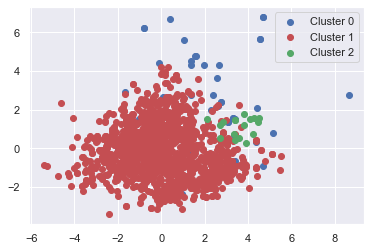

In [41]:
clr = 'rgb'
for i in np.unique(clusters):
    plt.scatter(X_new[clusters==i,0],
               X_new[clusters==i,1],
               color=clr[i], label='Cluster' + " " + str(i+1))
plt.legend()

**3D Visualization of Clusters**

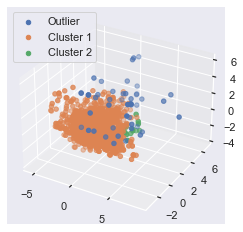

In [42]:
axes = plt.axes(projection='3d')
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    axes.scatter3D(X_new[clusters==i,0], 
                 X_new[clusters==i,1],
                 X_new[clusters==i,2],
                 label=label)

plt.legend()
plt.show()

In [43]:
predicted_labels = dbscan.labels_
metrics.silhouette_score(X_new, predicted_labels, metric='manhattan')

0.47364287828375795

# Conclusion

The *generated silhouette score* was **0.31736**.That silhouette score is relatively average for our **first model**, which indicates that clusters aren't dense or well spaced.
The goal of using principal component analysis is to minimize the number of dimensions. Using PCA, we transformed the *11-dimensional* data in this dataset to *6-dimensional data*.

Clustering has improved significantly of PCA implementation. As an outcome, a higher silhouette score is projected.

The silhouette score has improved, which is to be anticipated. However, it is still deemed low, implying that there is some cluster overlapping or inaccurate clustering. With PCA, *silhouette score* of the 2nd model increased by 40 percent and rose up to **0.47364**.

In the model I used K Means, which is one of the other unsupervised learning techniques, the *silhouette score* was **0.21**. In the version with PCA, the *silhouette score* increased to **0.24**.Although the silhouette ratio of Density-based spatial clustering of applications with noise does not seem very high, the ratios to K-Means increased by 50 percent.

Also using different metrics effected the silhoutte score.Switching from **euclidean** to **manhattan** decreased our score *0.34 to 0.31* for our first model but also increased our second model with pca *0.44 to 0.47*.

It would probably be wiser to use the decision tree model, which is one of the supervised learning techniques in this dataset. However our aim was to find the most suitable unspervised learning model.



